In [25]:
from urllib.request import urlopen
from urllib.error import HTTPError
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
from matplotlib import cycler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
IPython_default = plt.rcParams.copy()

colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [3]:
api = 'xxx' #use your API key from the FMP https://site.financialmodelingprep.com/developer/docs/

In [4]:
def growth(ticker, api_key, as_reported=False, limit=130):
    
    if as_reported:
        URL = (f"https://financialmodelingprep.com/api/v3/financial-growth/{ticker}?limit={limit}&apikey={api_key}")
             
    else:
        URL = (f"https://financialmodelingprep.com/api/v3/financial-growth/{ticker}?limit={limit}&apikey={api_key}")

    response = urlopen(URL)
    data = json.loads(response.read().decode("utf-8"))

    data_formatted = {}
    
    return data

def ratios(ticker, api_key, as_reported=False, limit=130):
    
    if as_reported:
        URL = (f"https://financialmodelingprep.com/api/v3/ratios/{ticker}?limit={limit}&apikey={api_key}")
             
    else:
        URL = (f"https://financialmodelingprep.com/api/v3/ratios/{ticker}?limit={limit}&apikey={api_key}")

    response = urlopen(URL)
    data = json.loads(response.read().decode("utf-8"))

    data_formatted = {}
    

    return data


def key(ticker, api_key, as_reported=False, limit=130):
    
    if as_reported:
        URL = (f"https://financialmodelingprep.com/api/v3/key-metrics/{ticker}?limit={limit}&apikey={api_key}")
             
    else:
        URL = (f"https://financialmodelingprep.com/api/v3/key-metrics/{ticker}?limit={limit}&apikey={api_key}")

    response = urlopen(URL)
    data = json.loads(response.read().decode("utf-8"))

    data_formatted = {}
    

    return data


def quote(ticker, api_key, as_reported=False):
    
    if as_reported:
        URL = (f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?serietype=line&apikey={api_key}")
             
    else:
        URL = (f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?serietype=line&apikey={api_key}")

    response = urlopen(URL)
    data = json.loads(response.read().decode("utf-8"))

    data_formatted = {}

    return data

In [5]:
stock_one = 'ABT'
ticker_list = ['ABBV',
'ABMD','A','ALGN','ABC','AMGN','ANTM','BAX','BDX','BIO',
'TECH','BIIB','BSX','BMY','CAH','CTLT','CNC','CERN','CRL','CI',
'COO','CVS','DHR','DVA','XRAY','DXCM',
'EW',
'GILD',
'HCA',
'HSIC',
'HOLX',
'HUM',
'IDXX',
'ILMN',
'INCY',
'ISRG',
'IQV',
'JNJ',
'LH',
'LLY',
'MCK',
'MDT',
'MRK',
'MTD',
'MRNA',
'MOH',
'OGN',
'PKI',
'PFE',
'DGX',
'REGN',
'RMD',
'STE',
'SYK',
'TFX',
'TMO',
'UNH',
'UHS',
'VRTX',
'VTRS',
'WAT',
'WST',
'ZBH',
'ZTS',] 

## Download Ratios , Growth and Price

In [6]:
df_initial = ratios(stock_one, api, as_reported=False, limit=130)
df_initial = pd.json_normalize(df_initial)

df_initial1 = growth(stock_one, api, as_reported=False, limit=130)
df_initial1 = pd.json_normalize(df_initial1)

df_initial2 = key(stock_one, api, as_reported=False, limit=130)
df_initial2 = pd.json_normalize(df_initial2)

for stock in ticker_list:
    df_new = ratios(stock, api, as_reported=False, limit=130)
    df_new = pd.json_normalize(df_new)
    df_initial = pd.concat([df_new,df_initial],axis = 0)
    
for stock in ticker_list:
    df_new1 = growth(stock, api, as_reported=False, limit=130)
    df_new1 = pd.json_normalize(df_new1)
    df_initial1 = pd.concat([df_new1,df_initial1],axis = 0)
    
for stock in ticker_list:
    df_new2 = key(stock, api, as_reported=False, limit=130)
    df_new2 = pd.json_normalize(df_new2)
    df_initial2 = pd.concat([df_new2,df_initial2],axis = 0)

In [7]:
df_initial['name'] = df_initial['symbol'] + df_initial['date']
df_initial['date'] = pd.to_datetime(df_initial['date'])

df_initial1['name'] = df_initial1['symbol'] + df_initial1['date']
df_initial1['date'] = pd.to_datetime(df_initial1['date'])

df_initial2['name'] = df_initial2['symbol'] + df_initial2['date']
df_initial2['date'] = pd.to_datetime(df_initial2['date'])

df_initial3 = pd.merge(df_initial, df_initial1, left_on='name', right_on='name')
df_initial3 = pd.merge(df_initial3, df_initial2, left_on='name', right_on='name')

In [10]:
FIELDS = ['close','date']

df_initial2 = quote(stock_one, api, as_reported=False)
df_initial2 = pd.json_normalize(df_initial2['historical'])
df_initial2['symbol_x'] = stock_one

for stock in ticker_list:
    df_new2 = quote(stock, api, as_reported=False)
    df_new2 = pd.json_normalize(df_new2['historical'])
    df_new2 = df_new2[FIELDS]
    df_new2['symbol_x'] = stock 
    df_initial2 = pd.concat([df_new2,df_initial2],axis = 0)
    
df_initial2 = df_initial2.rename(columns={"date": "date_x"})
df_initial2 = df_initial2.loc[:, ['symbol_x','date_x','close']]

In [32]:
df_1 = df_initial2[(df_initial2['date_x']>='2014-01-01') & (df_initial2['date_x']<='2020-01-01')]
df_2 = df_initial3[(df_initial3['date_x']>='2014-01-01') & (df_initial3['date_x']<='2020-01-01')]

In [33]:
df_1['date_x'] = pd.to_datetime(df_1['date_x'])
df_2['date_x'] = pd.to_datetime(df_2['date_x'])

df = pd.merge_asof(df_1.sort_values('date_x'),df_2.sort_values('date_x'), on='date_x', by='symbol_x', tolerance=pd.Timedelta("2 day"))

<ipython-input-33-f9386adeba99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date_x'] = pd.to_datetime(df_1['date_x'])
<ipython-input-33-f9386adeba99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['date_x'] = pd.to_datetime(df_2['date_x'])


In [34]:
df = df.dropna(subset=['period_x']).sort_values(['symbol_x','date_x'])

df['return'] = df.groupby('symbol_x')['close'].pct_change()
df = df.dropna(subset=['return']).sort_values(['symbol_x','date_x'])

#df = df.set_index('symbol_x')

df['return_next'] = df['return']
df['return_next'] = df.groupby('symbol_x')['return_next'].shift(-1)

df = df.dropna(subset=['return_next'])

df_for_ind = df

## Analysis - Single Security

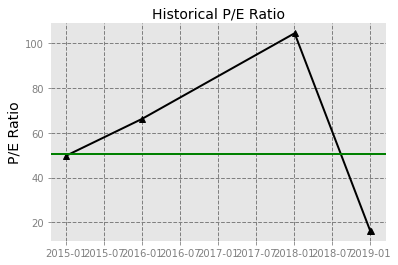

In [36]:
dd = df[df['symbol_x'] == 'BMY']

date = dd['date_x']
pe = dd['priceEarningsRatio']
mm = np.mean(dd['priceEarningsRatio'])

plt.plot(date, pe, color='black', marker='^')
plt.title('Historical P/E Ratio', fontsize=14)
plt.ylabel('P/E Ratio', fontsize=14)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.axhline(mm, color='green' ) # horizontal
plt.show()

## Download Index

In [37]:
FIELDS = ['close','date']

df_ind = quote('SPY', api, as_reported=False)
df_ind = pd.json_normalize(df_ind['historical'])
df_ind['symbol_x'] = 'SPY'
    
df_ind = df_ind.rename(columns={"date": "date_x"})
df_ind = df_ind.loc[:, ['symbol_x','date_x','close']]

In [38]:
df_ind = df_ind.sort_values(['date_x'])

df_ind['index_return'] = df_ind['close'].pct_change(periods=252)

df_ind['index_return_next'] = df_ind['index_return']
df_ind['index_return_next'] = df_ind['index_return_next'].shift(-252)

df_ind['date_x'] = pd.to_datetime(df_ind['date_x'])

df111 = pd.merge_asof(df_for_ind.sort_values('date_x'), 
                      df_ind.sort_values('date_x'), on='date_x', tolerance=pd.Timedelta("2 day"))

df = df111.drop_duplicates(subset=['currentRatio_x'], keep='last')

## OLS - Multiple Variables

In [39]:
df_test = df.dropna(subset=['return_next','grossProfitMargin', 'epsgrowth',
                            'roic','index_return_next','revenueGrowth','assetGrowth',
                            'researchAndDdevelopementToRevenue','payoutRatio_x','enterpriseValueOverEBITDA',
                           'roe','marketCap','return'])
y = df_test['return_next']
x = df_test[['grossProfitMargin','roic','index_return_next','revenueGrowth','epsgrowth',
            'assetGrowth','researchAndDdevelopementToRevenue','payoutRatio_x','enterpriseValueOverEBITDA',
            'roe','marketCap','return']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 100)

In [40]:
mlr = LinearRegression(fit_intercept = False)  
mlr.fit(x_train, y_train)

#x_train1 = sm.add_constant(x_train)
results = sm.OLS(y_train,x_train).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            return_next   R-squared (uncentered):                   0.374
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              7.455
Date:                Tue, 22 Mar 2022   Prob (F-statistic):                    1.14e-10
Time:                        22:47:58   Log-Likelihood:                         -41.849
No. Observations:                 162   AIC:                                      107.7
Df Residuals:                     150   BIC:                                      144.7
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
grossProfitMargin                     0.3304      0.107      3.076      0.002       0.118       0.543
roic                                  0.2399      0.253      0.950      0.344      -0.259       0.739
index_return_next                     0.6912      0.206      3.355      0.001       0.284       1.098
revenueGrowth                        -0.1676      0.169     -0.994      0.322      -0.501       0.165
epsgrowth                            -0.0080      0.004     -1.830      0.069      -0.017       0.001
assetGrowth                           0.2750      0.122      2.257      0.025       0.034       0.516
researchAndDdevelopementToRevenue    -0.1533      0.208     -0.738      0.462      -0.564       0.257
payoutRatio_x                        -0.0085      0.022     -0.393      0.695      -0.051       0.034
enterpriseValueOverEBITDA         -4.293e-05   4.32e-05     -0.994      0.322      -0.000    4.24e-05
roe                                  -0.0851      0.054     -1.581      0.116      -0.191       0.021
marketCap                         -7.488e-13   3.85e-13     -1.945      0.054   -1.51e-12    1.19e-14
return                               -0.1024      0.095     -1.075      0.284      -0.291       0.086
==============================================================================
Omnibus:                      108.262   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1120.270
Skew:                           2.261   Prob(JB):                    5.45e-244
Kurtosis:                      15.063   Cond. No.                     1.02e+12
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
y_pred_mlr= mlr.predict(x_test)
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

In [21]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.0
Coefficients:


[('grossProfitMargin', -0.03164482657562822),
 ('roic', 0.6113011372839502),
 ('index_return_next', 0.6855138229895712),
 ('revenueGrowth', 0.028942106415728357),
 ('epsgrowth', 0.005012942794343997),
 ('assetGrowth', 0.018830929593971094),
 ('researchAndDdevelopementToRevenue', 0.46613274247820996),
 ('payoutRatio_x', -0.01841290528802007),
 ('enterpriseValueOverEBITDA', -2.7648840691195614e-05),
 ('roe', 0.018356751686026216),
 ('marketCap', -5.774269951075439e-13),
 ('return', 0.0468188580275491)]

In [22]:
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 30.35
Mean Absolute Error: 0.22427863707609874
Mean Square Error: 0.11900495423908325
Root Mean Square Error: 0.34497094694928043


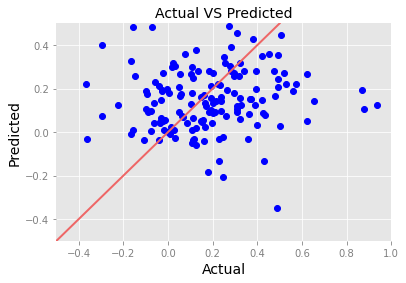

In [31]:
plt.scatter(y_test, y_pred_mlr,color='blue')

plt.title('Actual VS Predicted', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.xlabel('Actual', fontsize=14)
plt.axline([0, 0], [1, 1])
plt.xlim([-0.5, 1])
plt.ylim([-0.5, 0.5])

plt.show()